# Gradio + HuggingFace Spaces
https://tmabraham.github.io/blog/gradio_hf_spaces_tutorial

In [ ]:
from fastai.vision.all import *
import fastai
import torch

In [ ]:
print(f' Fastai {fastai.__version__}\nPytorch {torch.__version__}')
try:
    free, total = torch.cuda.mem_get_info()
    print(f'    GPU {torch.cuda.get_device_name(0)} ({total//1024**2} MB)')
except: print("No GPU detected")

 Fastai 2.7.7
Pytorch 1.12.0
    GPU NVIDIA GeForce GTX 1060 (6143 MB)


In [ ]:
path = untar_data(URLs.PETS)

In [ ]:
dls = ImageDataLoaders.from_name_re(path, 
                                    get_image_files(path/'images'), 
                                    pat='(.+)_\d+.jpg', 
                                    item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224, min_scale=0.75),
                                    bs=32)

learn = vision_learner(dls, models.resnet18, metrics=accuracy).to_fp16()
learn.fine_tune(2)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


D:\Python\miniconda\lib\site-packages\torchvision\models\_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  warnings.warn(
D:\Python\miniconda\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,1.115366,0.401725,0.876861,01:25


epoch,train_loss,valid_loss,accuracy,time
0,0.601527,0.386347,0.880244,01:31
1,0.399208,0.313128,0.898512,01:31


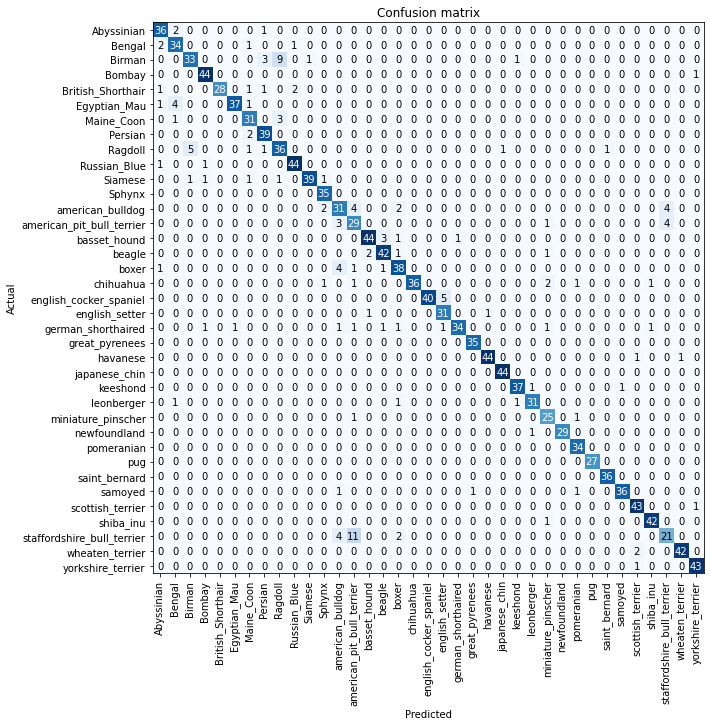

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10))

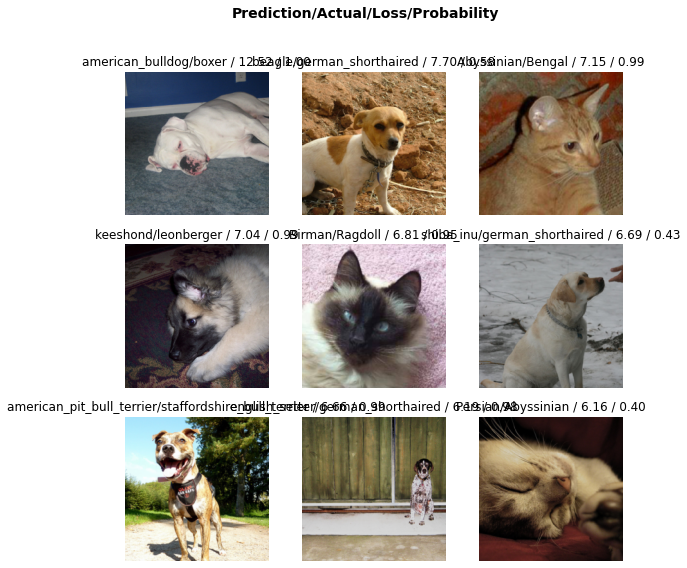

In [ ]:
# top losses
interp.plot_top_losses(9, nrows=3)

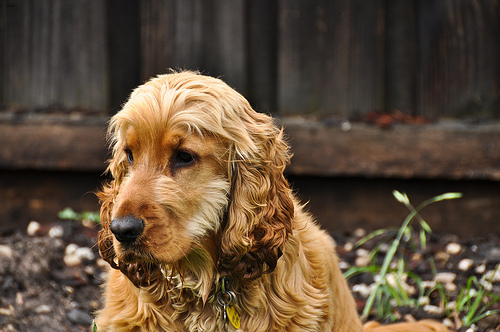

In [ ]:
def get_sample(n=0):
    """Get image from dataset and pass through pre-processing"""
    img = PILImage.create((path / "images").ls()[n])
    x, = first(dls.test_dl([img]))         
    return img, x

img, x = get_sample(n=2541)
img

In [ ]:
img.save('dog.jpg')

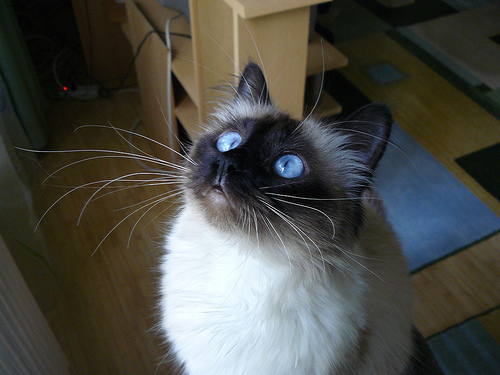

In [ ]:
img, x = get_sample(n=1342)
img

In [ ]:
img.save('cat.jpg')

### Export

In [ ]:
learn.path = Path('.')
learn.export()

In [ ]:
!ls

 Volume in drive D is Data
 Volume Serial Number is 707E-B10B

 Directory of D:\Python\ml-gradio

22/08/2022  02:33 PM    <DIR>          .
22/08/2022  02:06 PM    <DIR>          ..
22/08/2022  02:06 PM             1,928 .gitignore
22/08/2022  02:14 PM    <DIR>          .ipynb_checkpoints
22/08/2022  02:33 PM            30,581 dog.jpg
22/08/2022  02:33 PM        47,143,841 export.pkl
22/08/2022  02:06 PM             1,082 LICENSE
22/08/2022  02:31 PM           693,765 pets_model.ipynb
22/08/2022  02:06 PM                69 README.md
               6 File(s)     47,871,266 bytes
               3 Dir(s)  726,888,423,424 bytes free


# Using Gradio

In [ ]:
learn = load_learner('export.pkl')

Define prediction function:

In [ ]:
labels = learn.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

#### Gradio Customisation

In [ ]:
title = "Pet Breed Classifier"
description = "A pet breed classifier trained on the Oxford Pets dataset with fastai."
article="<p style='text-align: center'><a href='https://tmabraham.github.io/blog/gradio_hf_spaces_tutorial' target='_blank'>Blog post</a></p>"

examples = ['dog.jpg', 'cat.jpg', 'elephant_shrew.jpg']
enable_queue=True


In [ ]:
gr.Interface(fn=predict,
             inputs=gr.inputs.Image(shape=(512, 512)),
             outputs=gr.outputs.Label(num_top_classes=3),
             title=title,
             description=description,
             article=article,
             examples=examples,
             interpretation='default').launch(share=True)


D:\Python\miniconda\lib\site-packages\gradio\inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
D:\Python\miniconda\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
D:\Python\miniconda\lib\site-packages\gradio\outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
D:\Python\miniconda\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7865/
Running on public URL: https://49348.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App>,
 'http://127.0.0.1:7865/',
 'https://49348.gradio.app')